<a href="https://colab.research.google.com/github/MuzMoh/Ulabox_Customer_Segmentation/blob/main/Ulabox_Order_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we try to segment customers into different categories based on their purchasing behaviour. Conclusions from customer segmentation can give us bussiness insights and strategies.

Topics explored in the notebook

1. Importing required libraries and data
2. Simple visualisation of the data and few samples
3. Visualisation via pca and pairplot
4. Checking for dependent variables
5. Outlier detection and handling
6. Cluster analysis: Are there clusters, how many?
7. Clustering and interpretation
8. Deriving conclusions

# 1. Importing required libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
import itertools

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Ulabox Customer Segmentation/ulabox_orders_with_categories_partials_2017.csv')

In [3]:
data.head()

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0         0      0           45      23.03        4    13   9.46   87.06   
1         0      1           38       1.22        5    13  15.87   75.80   
2         0      2           51      18.08        4    13  16.88   56.75   
3         1      3           57      16.51        1    12  28.81   35.99   
4         1      4           53      18.31        2    11  24.13   60.38   

   Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
0     3.48   0.00     0.00     0.00    0.0    0.0  
1     6.22   2.12     0.00     0.00    0.0    0.0  
2     3.37  16.48     6.53     0.00    0.0    0.0  
3    11.78   4.62     2.87    15.92    0.0    0.0  
4     7.78   7.72     0.00     0.00    0.0    0.0

# 2. Simple Visualisation

In [4]:
data.describe()

customer         order   total_items     discount%       weekday  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    5012.483367  14999.500000     31.739933      8.455495      3.642367   
std     2888.646245   8660.398374     20.576579     14.199350      2.122031   
min        0.000000      0.000000      1.000000    -65.150000      1.000000   
25%     2541.750000   7499.750000     18.000000      1.177500      2.000000   
50%     5043.000000  14999.500000     29.000000      4.160000      3.000000   
75%     7483.000000  22499.250000     41.000000      9.990000      5.000000   
max    10238.000000  29999.000000    298.000000    100.000000      7.000000   

               hour         Food%        Fresh%       Drinks%         Home%  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      15.034667     23.560406     20.227279     23.349235     13.539575   
std        5.717052     21.719824     23.661767     22.523335     17.850282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      7.220000      0.000000      6.710000      0.000000   
50%       15.000000     19.650000     10.930000     17.890000      7.210000   
75%       20.000000     33.260000     35.790000     33.162500     20.002500   
max       23.000000    100.000000    100.000000    100.000000    100.000000   

            Beauty%       Health%         Baby%         Pets%  
count  30000.000000  30000.000000  30000.000000  30000.000000  
mean       5.892949      1.132959     11.096145      1.043087  
std       13.996518      5.307620     24.740364      6.195390  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        6.512500      0.000000      4.172500      0.000000  
max      100.000000    100.000000    100.000000    100.000000

1. customer is the unique customer id.
2. order is the unique order id.
3. total_items is the number of products bought in the order.
4. discount% is the amount of discount provided during the purchase, the negative values in discount stands for extra amount the customer paid to ulabox as delivery charge or any other mode of fee.
5. weekday is the day of the week in which the order was placed.
6. hour is the time in which the order is placed.
7. Food% is the amount of money spent on non fresh food in the purchase, it may include grocery products like sugar, coffee powder, oats etc.
8. Fresh% is the amount of money spent on fresh food like milk, fruits, vegetables etc.
9. Drinks% is most probably the percentage of amount spent on alchohol like wine, vodka, scotch etc. There is a teeny tiny chance that these also include soft drinks.
10. Home% is the percentage of money spent in home accessories.
11. Beauty% is the percentage of amount spent in beauty products
12. Health% is the percentage of amount spent in medicine or health products like protein supplement, carb supplement etc.
13. Baby% is the percentage spent in baby products.
14. Pets% is the percentage spent in pet products like pedigree.

In [5]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True)

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
4554       1487   4554            9     -63.64        7    13   0.00    0.00   
7185       2418   7185            9     -47.26        5     8   0.00    0.00   
768         199    768           14     -39.84        6     8  28.97    0.00   
16098      5379  16098            8     -26.15        3    13   0.00    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
5060       1696   5060           26      -0.34        4    11  24.60    0.00   
17998      6038  17998           22      -0.33        2    23   4.74    0.00   
13526      4557  13526           77      -0.19        4    12  78.57    0.00   
20654      6889  20654           44      -0.04        4     0  33.87    0.00   
8247       2875   8247           35      -0.03        6     9  34.31   32.01   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
23632    86.97  13.03     0.00     0.00   0.00    0.0  
4554    100.00   0.00     0.00     0.00   0.00    0.0  
7185    100.00   0.00     0.00     0.00   0.00    0.0  
768      71.03   0.00     0.00     0.00   0.00    0.0  
16098   100.00   0.00     0.00     0.00   0.00    0.0  
...        ...    ...      ...      ...    ...    ...  
5060     34.11  32.87     8.42     0.00   0.00    0.0  
17998    15.49   0.00     0.00     0.00  79.77    0.0  
13526    14.69   6.74     0.00     0.00   0.00    0.0  
20654    14.96  17.42    15.40    18.36   0.00    0.0  
8247      5.33   8.90     8.66     6.45   4.34    0.0  

[126 rows x 14 columns]

* drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks.

## Selecting Samples

In [6]:
indices = [56,2459,908,23632,1803,218,592,349]
data.iloc[indices, :]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
56            4     56           32       3.10        3    19  36.49   53.59   
2459        744   2459           57      14.01        2    22  24.86    7.26   
908         238    908           23       2.98        3    21   8.20   19.14   
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
1803        529   1803            9       5.77        4     7   0.00    0.00   
218          43    218           21       9.87        3    16   0.00    0.00   
592         145    592           15       4.51        5    19   7.48    0.00   
349          70    349           17      27.05        1    15  19.01    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
56        9.92   0.00     0.00     0.00   0.00   0.00  
2459     21.37  19.64     1.64     0.72  24.51   0.00  
908      32.27   4.97     4.02     1.89  29.51   0.00  
23632    86.97  13.03     0.00     0.00   0.00   0.00  
1803      0.00  25.56     0.00     0.00   0.00  74.44  
218      23.69  76.31     0.00     0.00   0.00   0.00  
592       0.00  16.22    60.29     0.00   0.00  16.00  
349       0.00   0.00     0.00     0.00  80.99   0.00

* 56 order seems to depend on ulabox for grocery, fresh food and drinks.
* 2459 and 908 order seems to depend on ulabox for everything, probably most valuable customers.
* 23632 order seems to buy a lot of drinks from ulabox in spite of the negative discount, which implies extra charges.
* 1803 buys a lot of pet products, the order must be by a pet lover.
* 218 buys a lot of home decoratory accessories.
* 592 must be a woman, who would like her beauty products, to be delivered by ulabox at her door.
* 349 seems to be parents, who newly had a baby.


There may not be any relevant information in the hour in which the order was placed, but the weekday in which the order was placed may reveal some information about weekend buyers. Hece let's keep it.

Let's remove customer, order and hour features from the data

In [7]:
df = data.drop(['customer', 'order', 'hour'], axis=1)
frame = data

# 3. Visualization via pca and pairplot

Let's try and do pca of the features and see the explained variance and plots

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(n_components=11)

This function takes the pca object and data frame as argurments and plots the explained variance of every feature in each principal component.

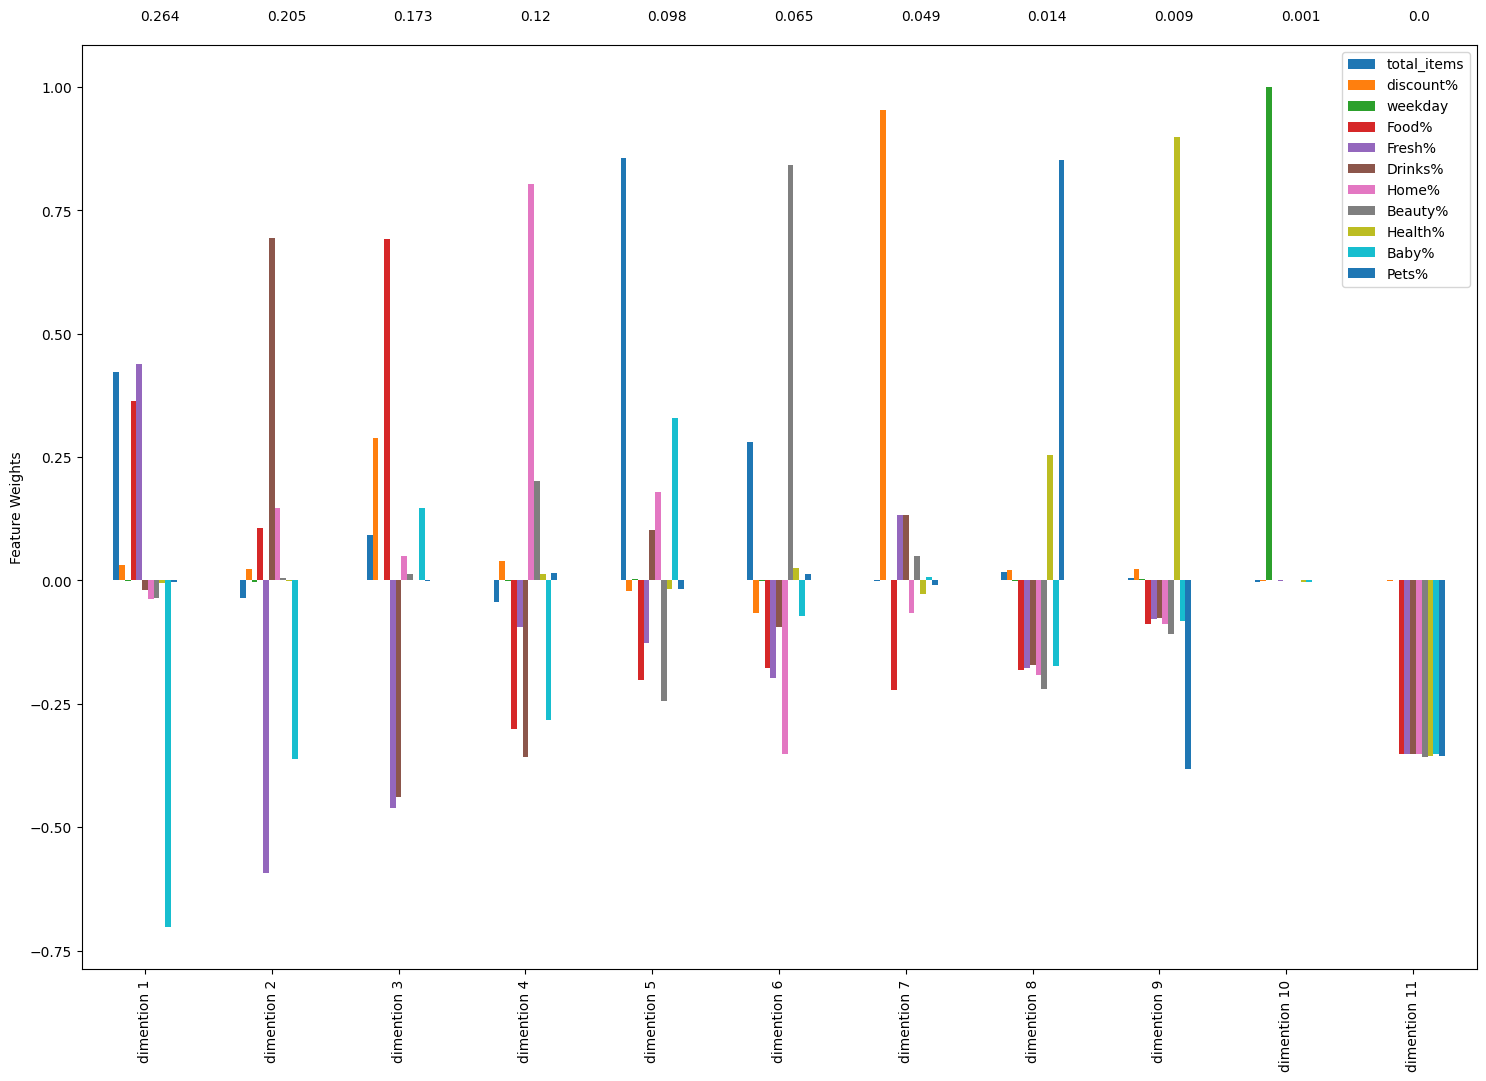

In [10]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

pca_results(pca, df)

This function accepts pca object and data frame as arguements and plots the scatter plot of first four principal components.

<Figure size 1000x1000 with 0 Axes>

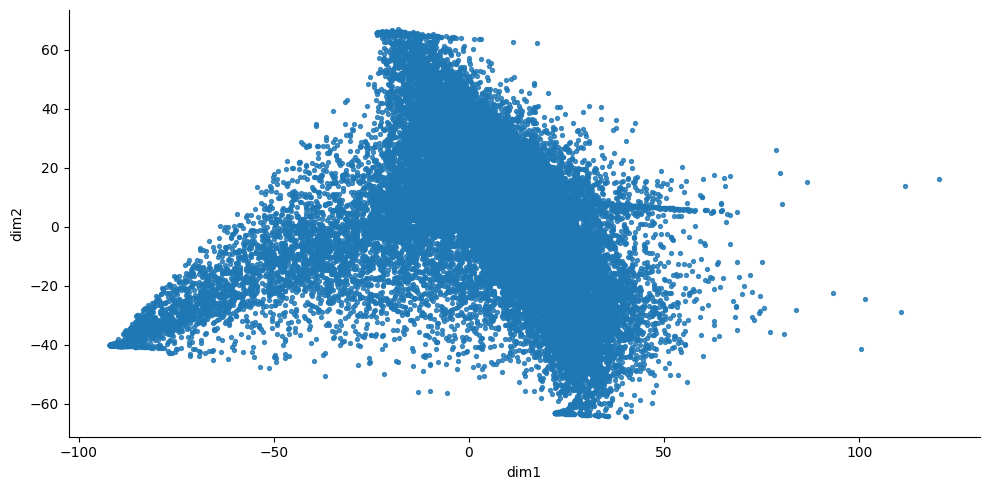

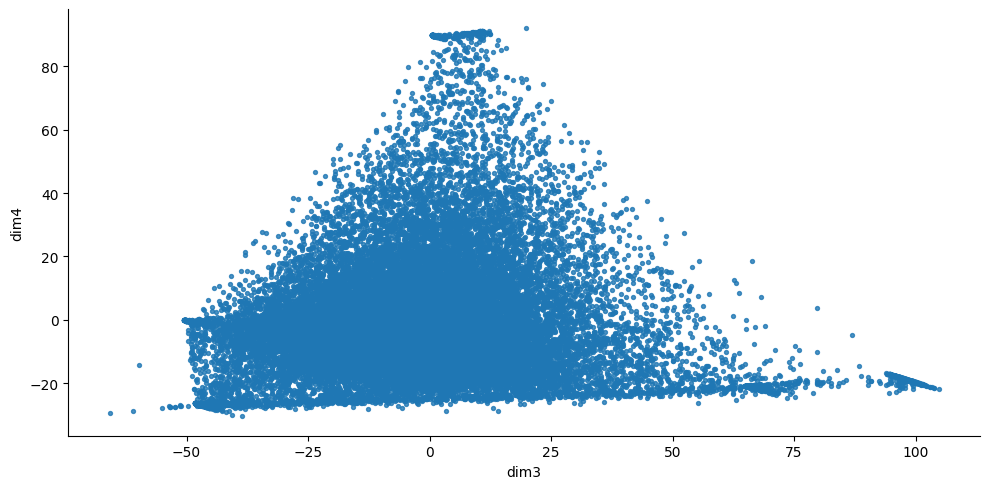

In [16]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, aspect=2, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, aspect=2, fit_reg=False, scatter_kws={'s':8});
    plt.show()

pca_2d_plot(pca, df)

Now let's plot the pairplots and see the variations and distributions of features with respect to each other.

<Figure size 2000x2000 with 0 Axes>

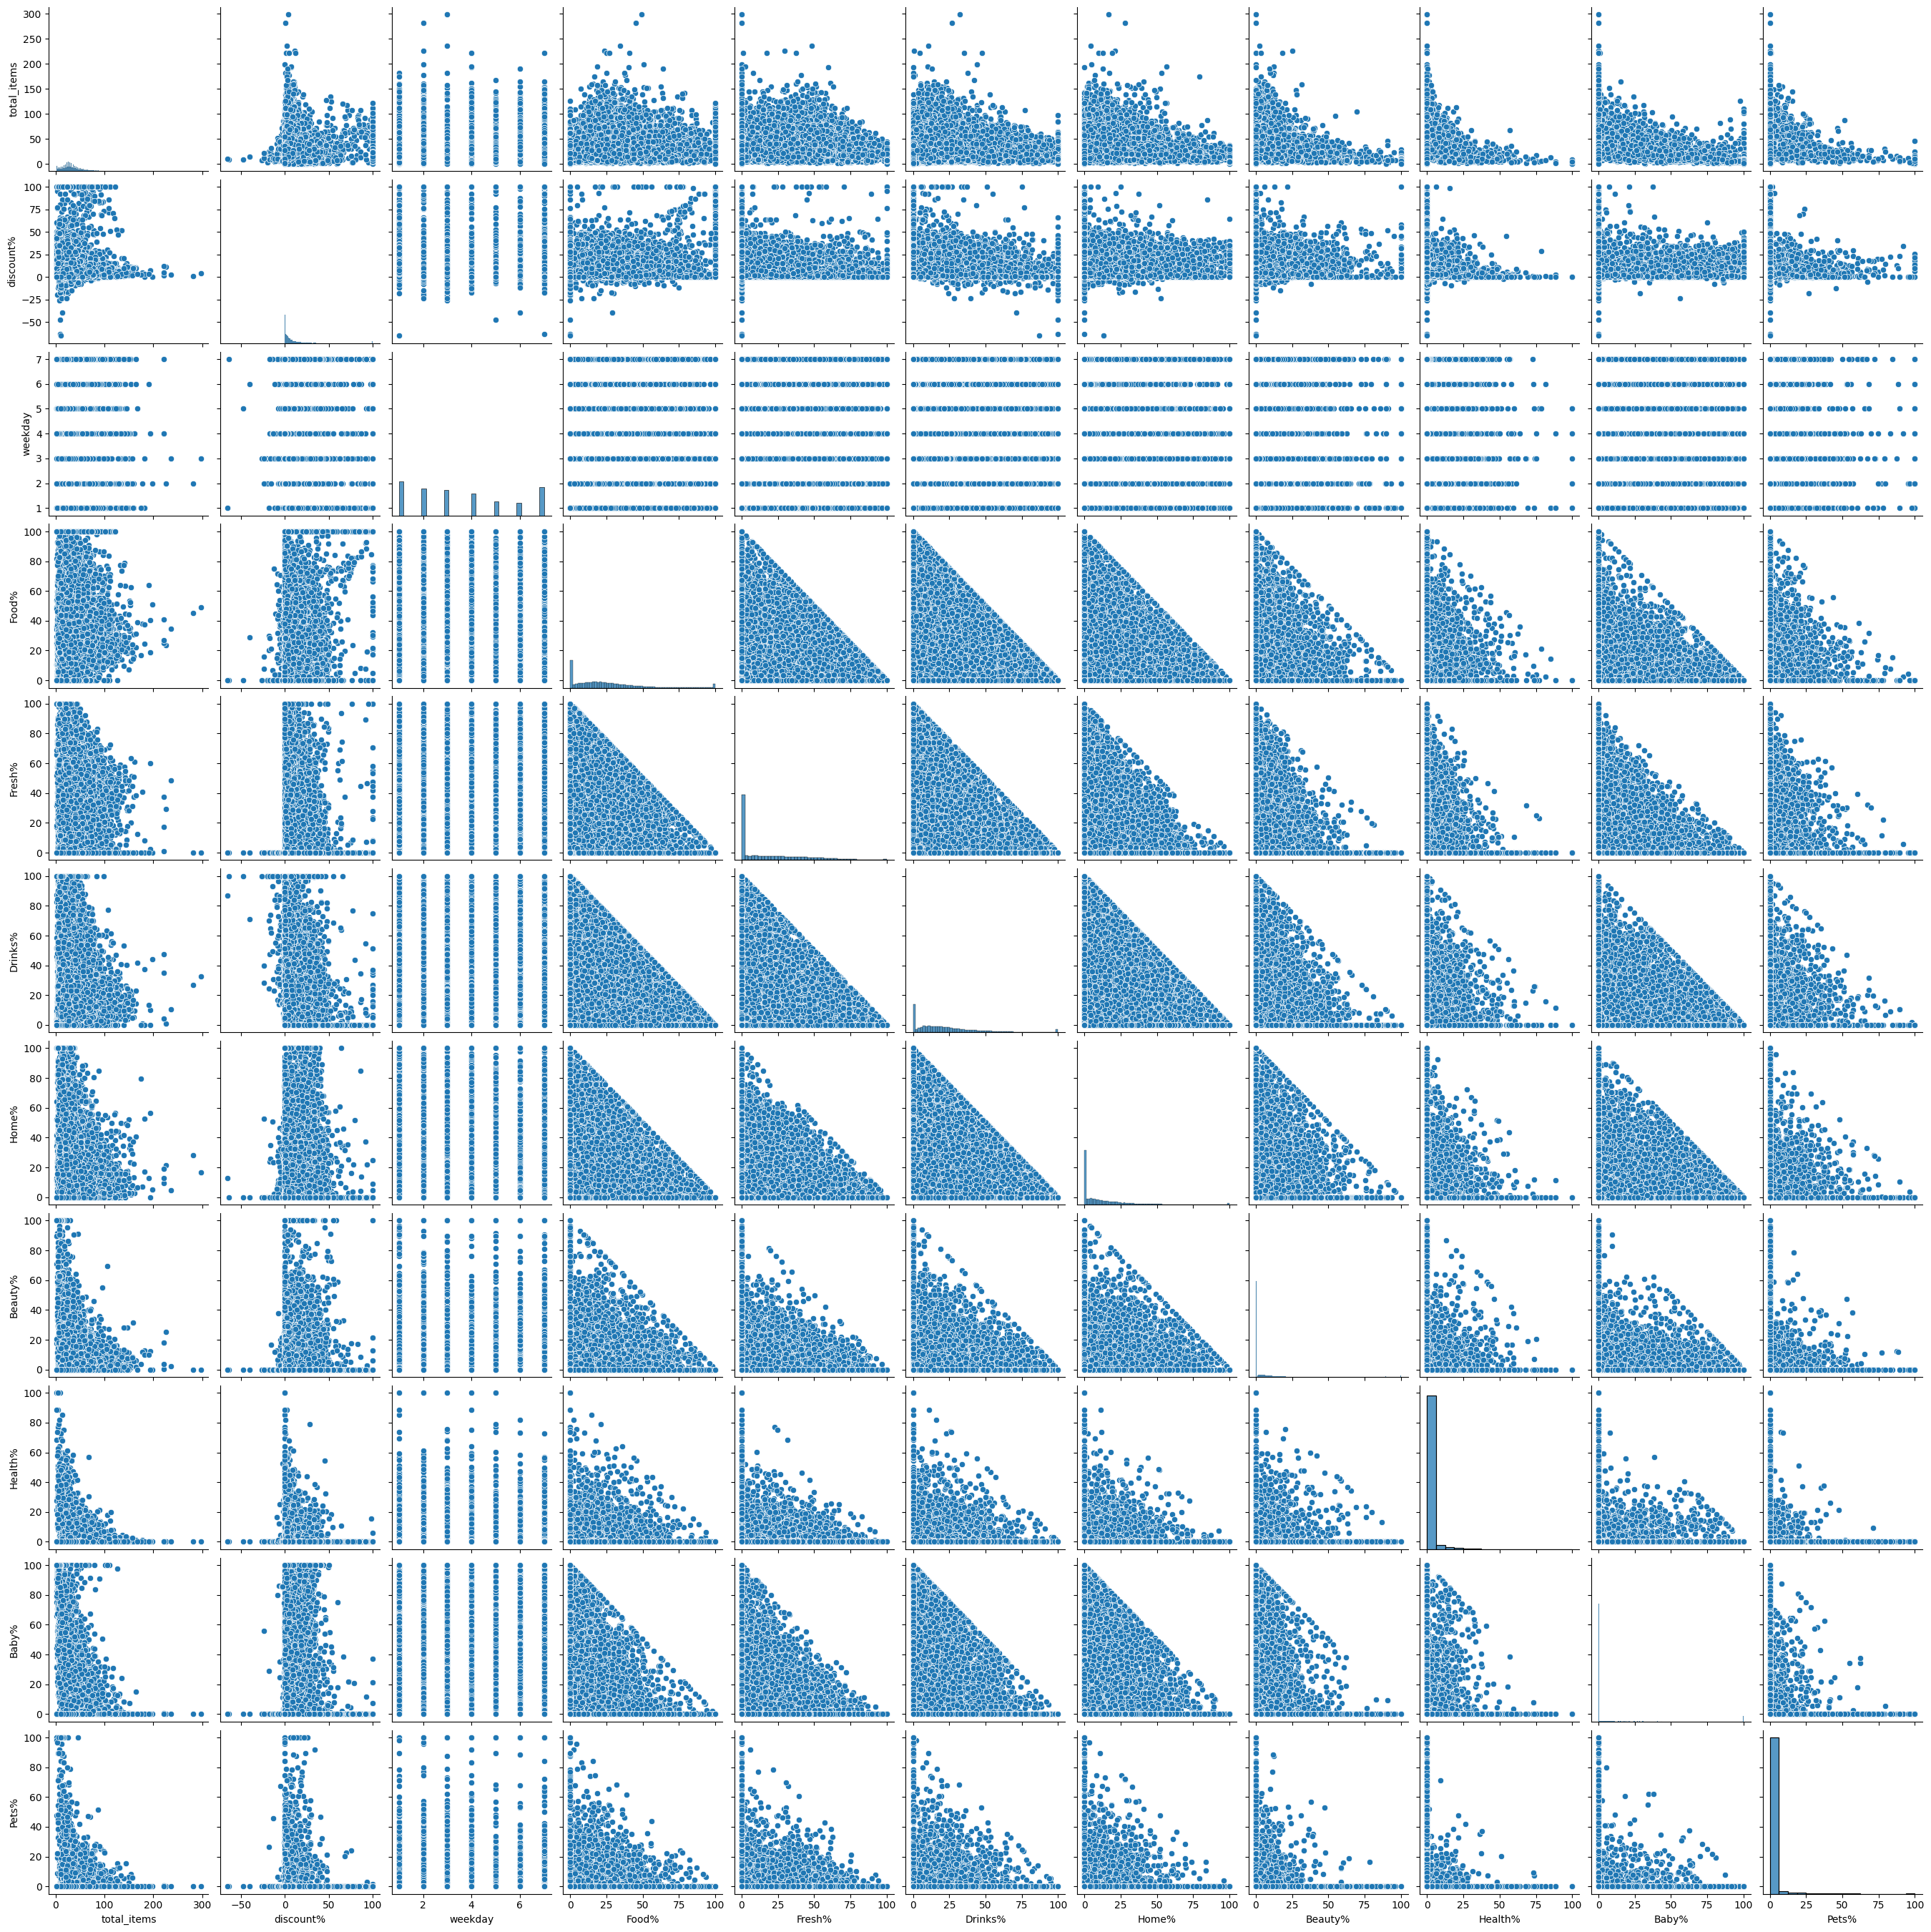

In [17]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

* total_items is skewed, applying a log transformation will help the clustering.
* when discount% increases total_items icreases which makes sense, people will buy more on discount.
* below the 0 discount line only Drinks% has non zero percentage entries. Food%, Fresh% etc. have only zero percentage entries in negative discount area.
* it makes sense that the plots in the right bottom are bound by the line x+y = 100, as the data is actually in percentage x+y <= 100.
* the distribution plots are more and more skewed as we move towards the right bottom, as pet products, baby products and health products are brought by very less people.

# 4. Checking Dependant Variables

This function takes the data frame as arguement and prints R2 score of model trained with each feature as target. This is a good method to identify the dependant variables from our dataset. This can be used in other contexts as well.

In [18]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

dependant_variable_detector(df)

Using total_items as dependent variable R2 score is :0.15848816407725963
Using discount% as dependent variable R2 score is :0.12779784963128127
Using weekday as dependent variable R2 score is :0.0019194529930831594
Using Food% as dependent variable R2 score is :0.9925724183188357
Using Fresh% as dependent variable R2 score is :0.9937312704627193
Using Drinks% as dependent variable R2 score is :0.9930865737794141
Using Home% as dependent variable R2 score is :0.9889948946530749
Using Beauty% as dependent variable R2 score is :0.9827301055344402
Using Health% as dependent variable R2 score is :0.888319659143346
Using Baby% as dependent variable R2 score is :0.994269557581205
Using Pets% as dependent variable R2 score is :0.9155244182728488


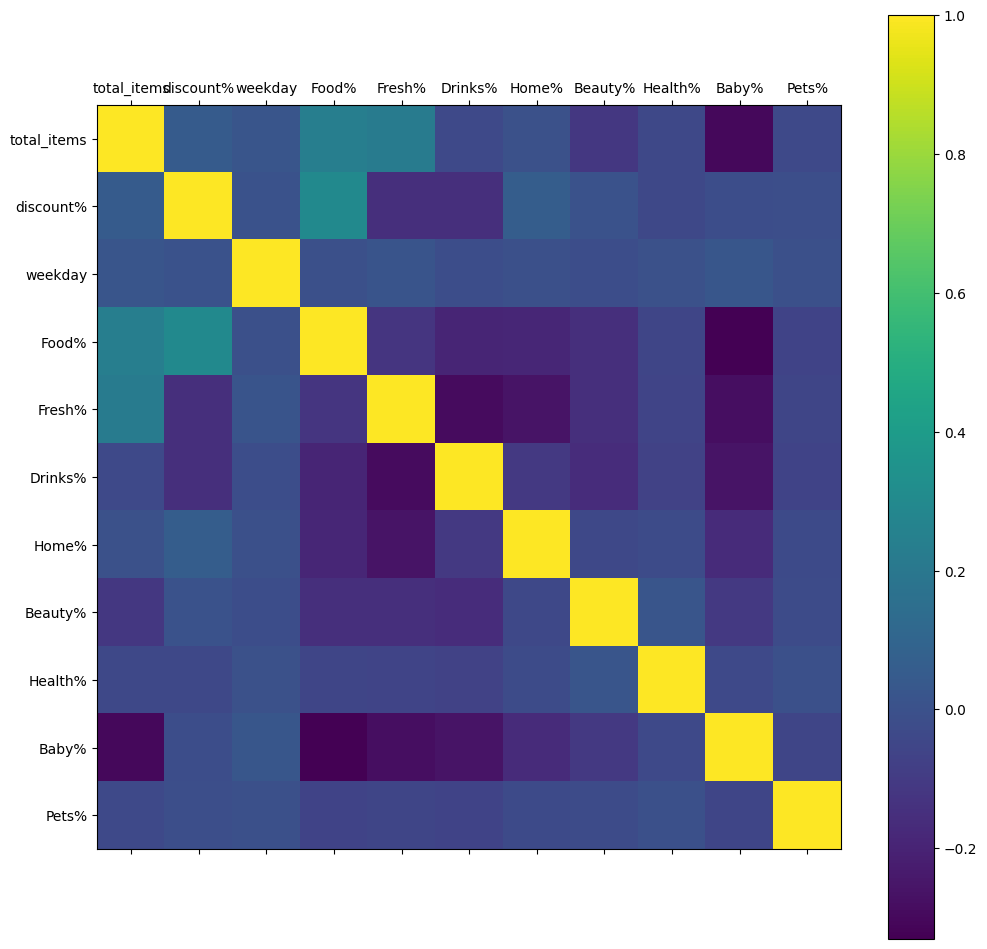

In [19]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

plot_corr_matrix(df)

* The high R2 score in the case of Food%, Fresh% etc. does not mean they don't contain any information individually.
* The high R2 score is owing to this relationship Food% + Fresh% + .......+ Pets% = 100, the regression model has learned it.



# 5. Outlier detection

<ipython-input-20-886382ad922d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


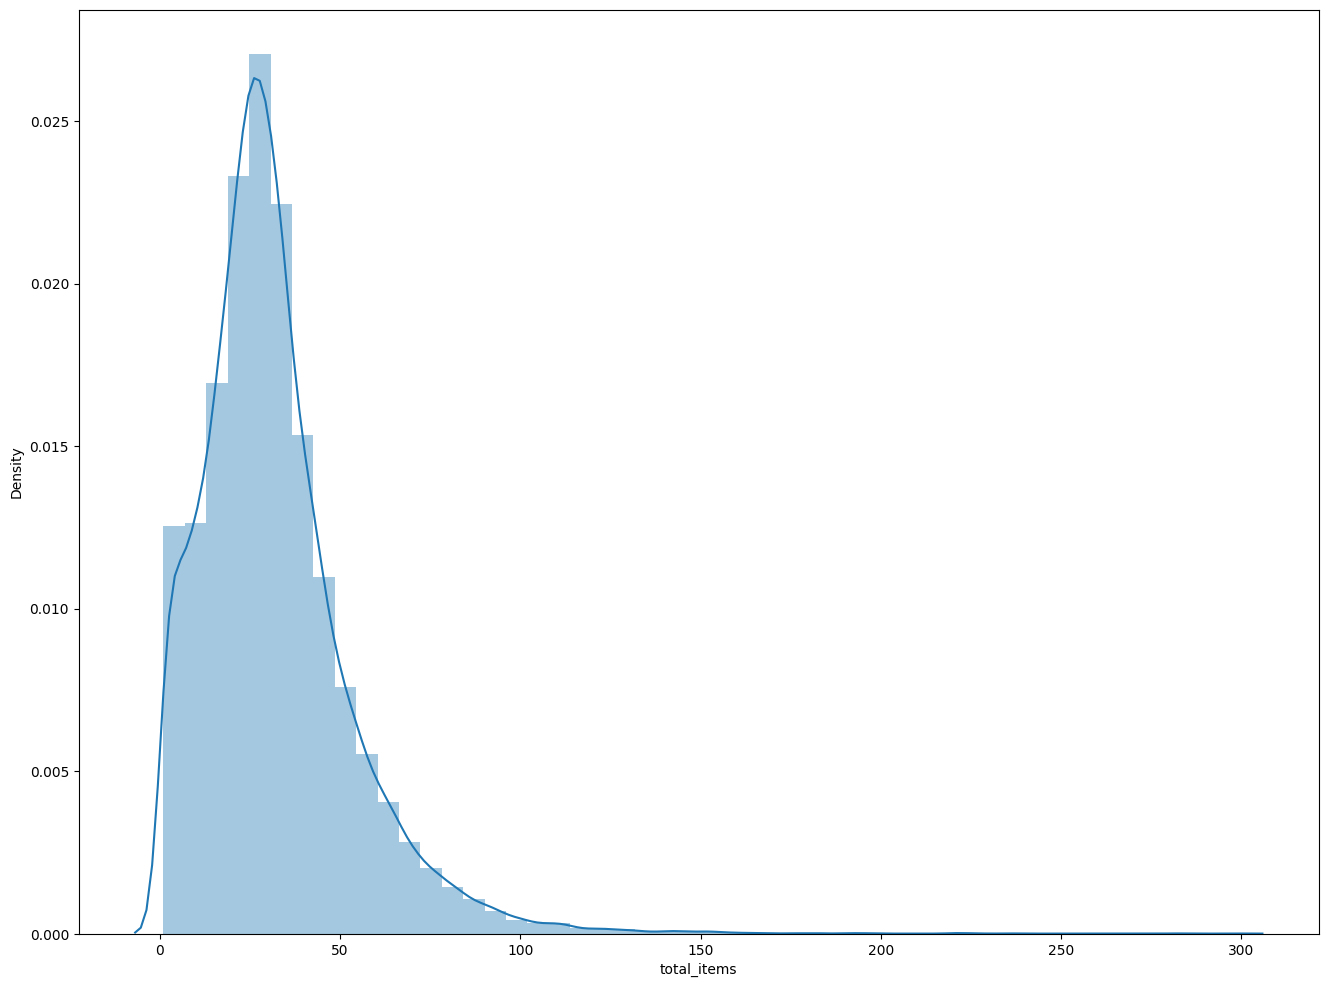

In [20]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

This distribution is skewed negatively, let's apply a log transformation.

<ipython-input-21-c11b2a342790>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


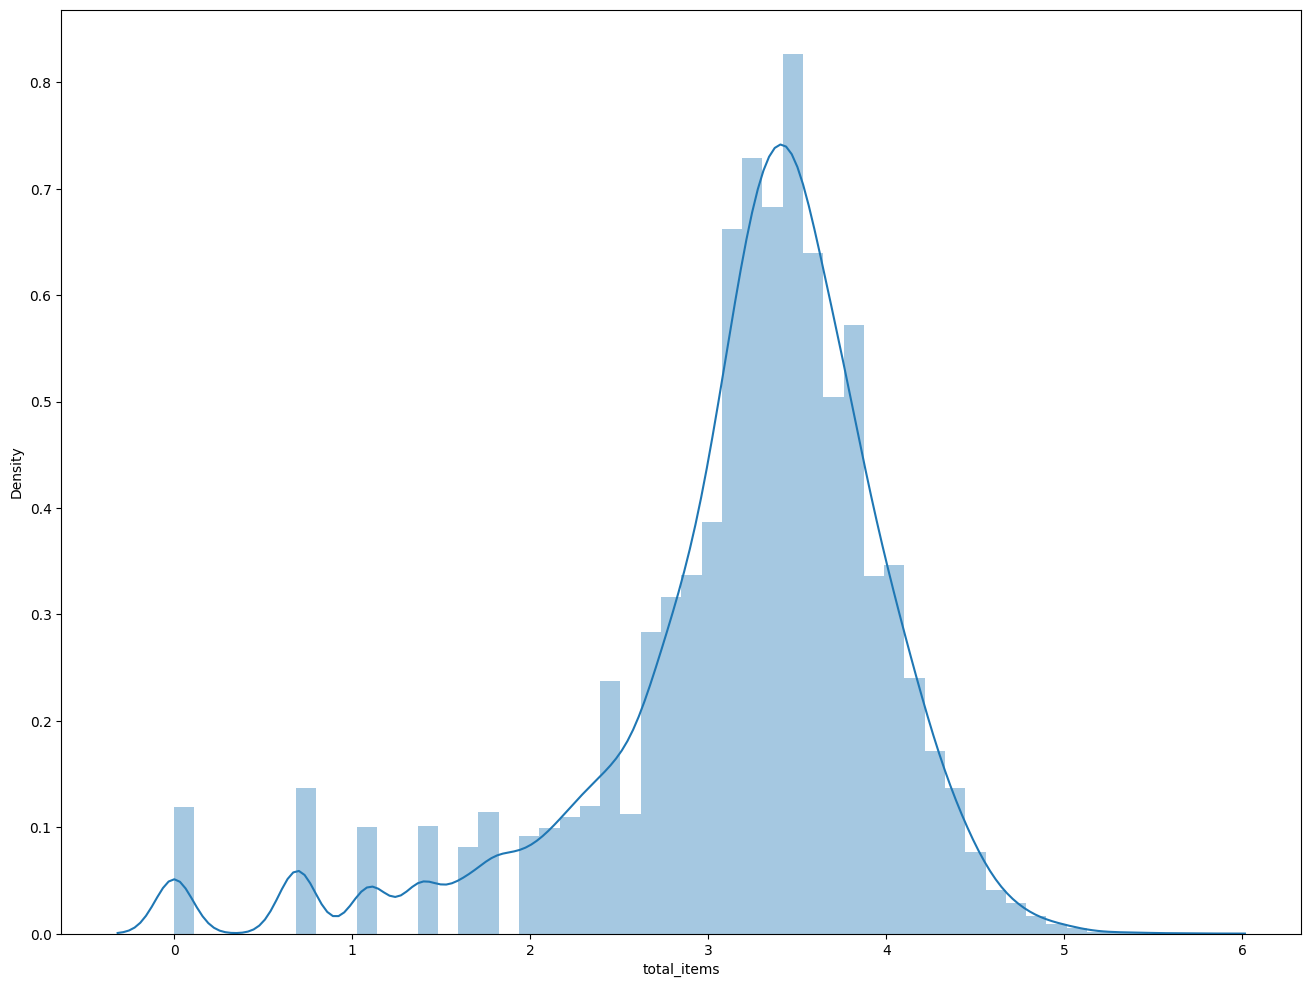

In [21]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

That's better

**Turkey Outlier Detection**

* According to Turkey method a point is an outlier if it lies 1.5 times inter
quartile distance to the right of third quartile or if it lies 1.5 times inter quartile distance to the left of first quartile.


This function takes df as an arguement and columns for which outlier detection has to be done, as an optional arguement. It returns a dictionary whose keys are column names and elements are indices of outlier points in the corresponding columns. It also prints the number of outliers in every column.

In [22]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]

    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index

    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))

    return outlier_indices

outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->1899
_________________________
discount%-------->2337
_________________________
weekday-------->0
_________________________
Food%-------->1221
_________________________
Fresh%-------->254
_________________________
Drinks%-------->1386
_________________________
Home%-------->1432
_________________________
Beauty%-------->2901
_________________________
Health%-------->30000
_________________________
Baby%-------->6403
_________________________
Pets%-------->30000


* The outliers in Health% and Pets% are due to the fact that, lot people don't buy these products and the entries are mostly 0.
* The outliers in Food%, Fresh% etc. are due to the 0% and 100% entries which is a completely natural phenomenon in this scenerio.
* The outliers in discount% is also due to 0% and 100% entries.
* For these features let's acknoledge the fact that there are outliers and leave it there.
* Let's remove the outliers in total_items.

In [23]:
df.drop(outlier_indices['total_items'], inplace=True)
frame.drop(outlier_indices['total_items'], inplace=True)

# 6. Are there clusters in the data, how many clusters?

**Elbow Method**

* The first method we are going to try is the elbow method.
* In this method we plot the sum of distances of all the data points to the correspoding cluster centeroids vs number of clusters, for a range of number of clusters.
* If there is a elbow in the plot the point at which elbow occured is the number of clusters present in the data.
* We are lucky if we see an elbow in the plot, but in most cases the plot will just be smooth revealing no information about the number of clusters.

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

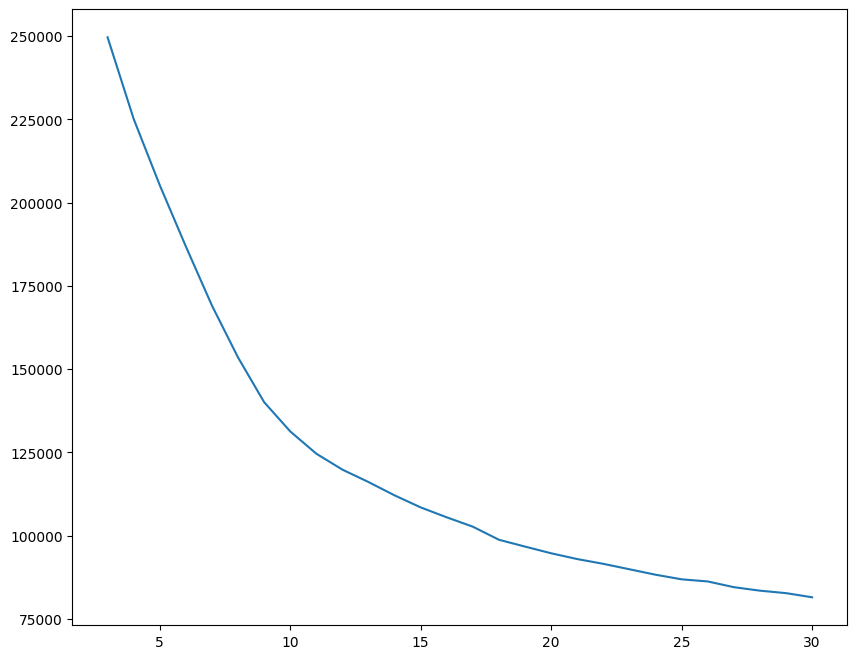

In [25]:
X = scaler.fit_transform(df.values)
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

We got lucky! There is somewhere around 10 clusters in the data.

**Hopkins Statistic**

* For every data point in the given data, calculate nearest neighbor distance and take it's sum. Let this be s.
* Generate random data in the same shape as the given data.
* For the random data calculate the nearest neighbor distance and take it's sum. Let this be r.
* Hopkins statistic score = s/(s+r).
* The intuition is, if the sample data has clusters in it, the nearest-neighbor-distance-sum of sample will be very much smaller than that of random data.
* A very small Hopkins statistic score means the data has very good clusters.

In [26]:
def hopkins_statistic(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25,0.5,0.75]]
    states = [123,42,67,248,654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state=random_state)
            nbrs = NearestNeighbors(n_neighbors=2)
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1]
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist+random_dist)
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic :'+str(hs))
        print('mean hopkins statistic :'+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

hopkins_statistic(df)

------------7025------------
*************************
hopkins statistic :0.6201105858465122
*************************
hopkins statistic :0.6198304102458453
*************************
hopkins statistic :0.619410919644669
*************************
hopkins statistic :0.6199094150544211
*************************
hopkins statistic :0.6153356799337115
mean hopkins statistic :0.6189194021450318
hopkins statistic standard deviation :0.0018063019831433395
------------14050------------
*************************
hopkins statistic :0.60684728605224
*************************
hopkins statistic :0.6086666097992216
*************************
hopkins statistic :0.6083211608484318
*************************
hopkins statistic :0.606843418826935
*************************
hopkins statistic :0.6080090266119104
mean hopkins statistic :0.6077375004277478
hopkins statistic standard deviation :0.0007575610500536487
------------21075------------
*************************
hopkins statistic :0.6017252181529423
*****

We take different number of samples from the data and generate random data with different seeds and calculate hopkins statistic for each. The Hopkins statistic score is bad. Let's proceed with the analysis.

Kth Nearest Data point
* Calculate the sum of distances of kth nearest neighbor of all the data points in the given data.
* Plot the value of the sum against k.
* If there is a sharp decline in the rate of change of y at some value of k, then there are clusters in the data.

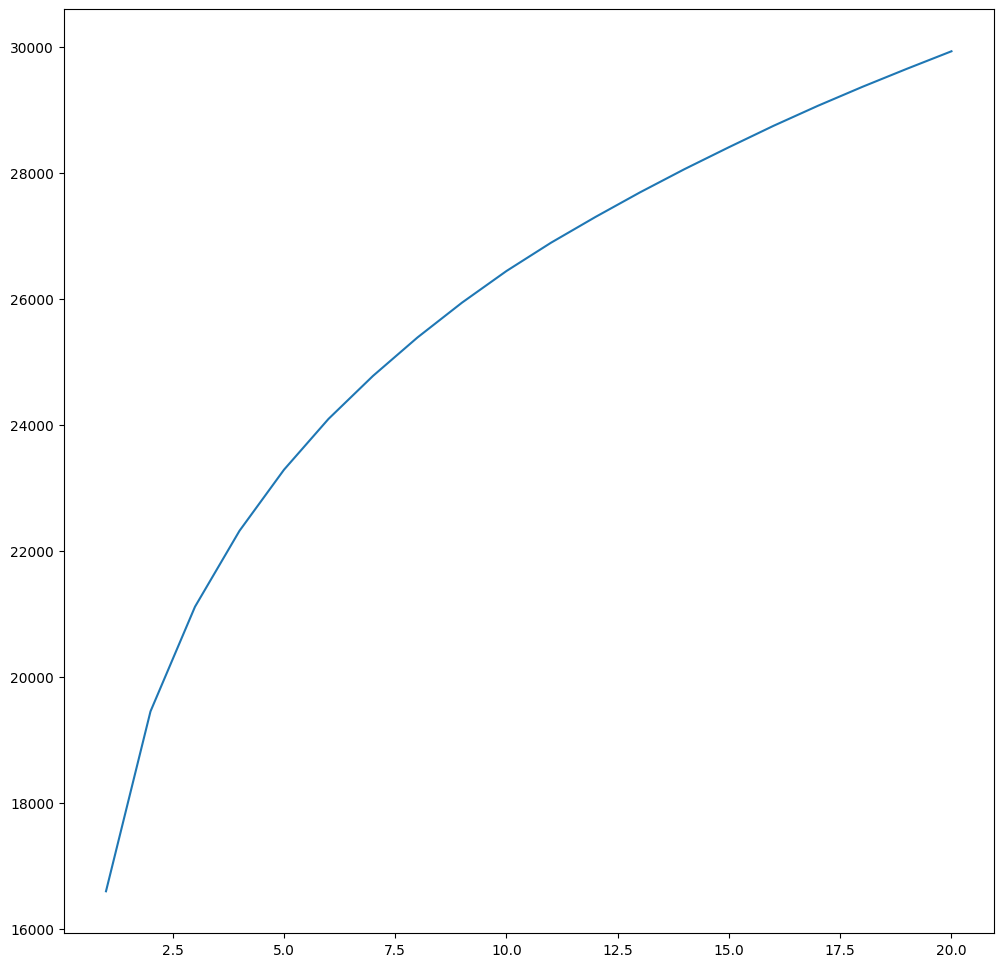

In [27]:
def kth_nearest_data_point(df, k_max):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    ks = range(1,k_max+1)
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)
    nbrs = NearestNeighbors(n_neighbors=k_max)
    nbrs.fit(X)
    kneighbors_result = nbrs.kneighbors()[0]
    kth_neighbor_dist = list(np.sum(kneighbors_result, axis=0))
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, kth_neighbor_dist);
    plt.show()

kth_nearest_data_point(df, 20)

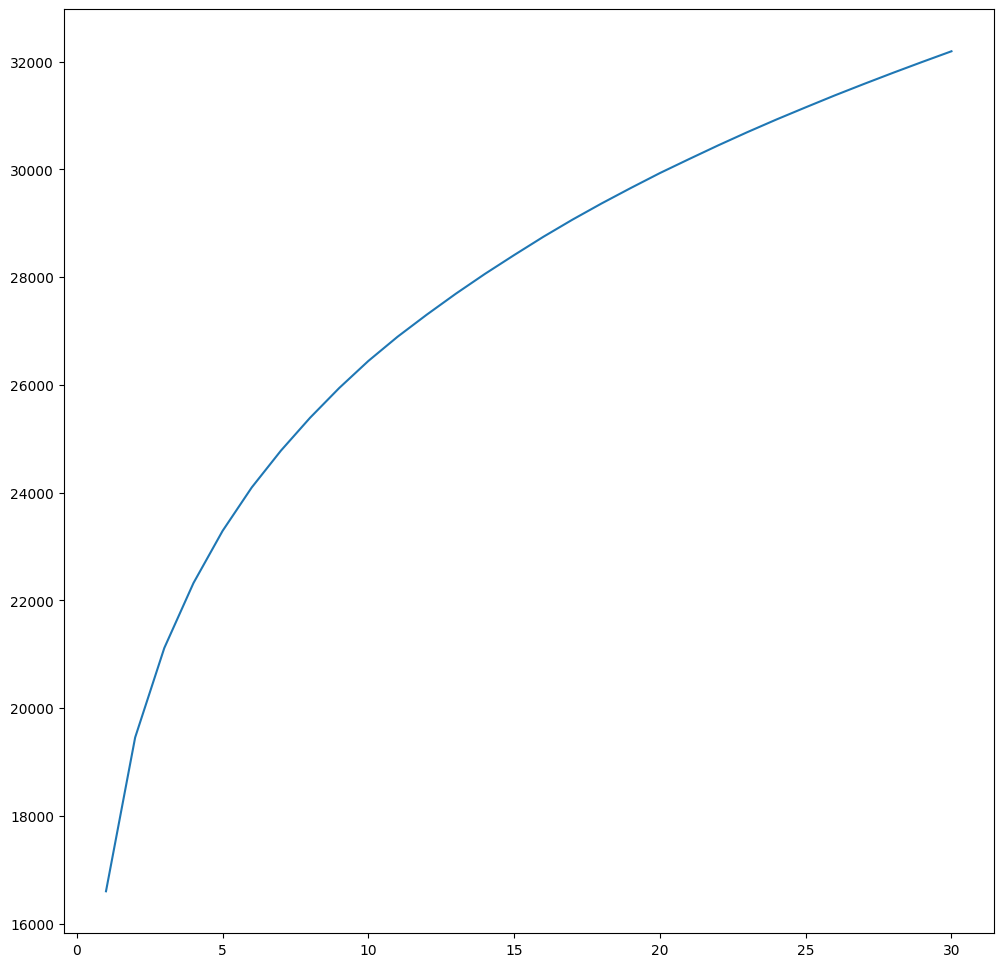

In [28]:
kth_nearest_data_point(df,30)

**Silhoutte Score**


\begin{align}
  S = \frac{(b_i – a_i)}{max(a_i, b_i)}
  \end{align}

* a(i) is the average intra-cluster distance i.e the average distance between each point within a cluster.
* b(i) is the mean distance between the observation and all other data points of the next nearest cluster
* If a data point is more similar to its own cluster and very much different from other clusters, then a(i)<<b(i), the greater will be the silhoutte score.
* The silhoutte score we plot is the average of it over all the data points.


**Points to Remember While Calculating Silhouette Coefficient:**

* The value of the silhouette coefﬁcient is between [-1, 1].
* A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
* The worst value is -1. Values near 0 denote overlapping clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

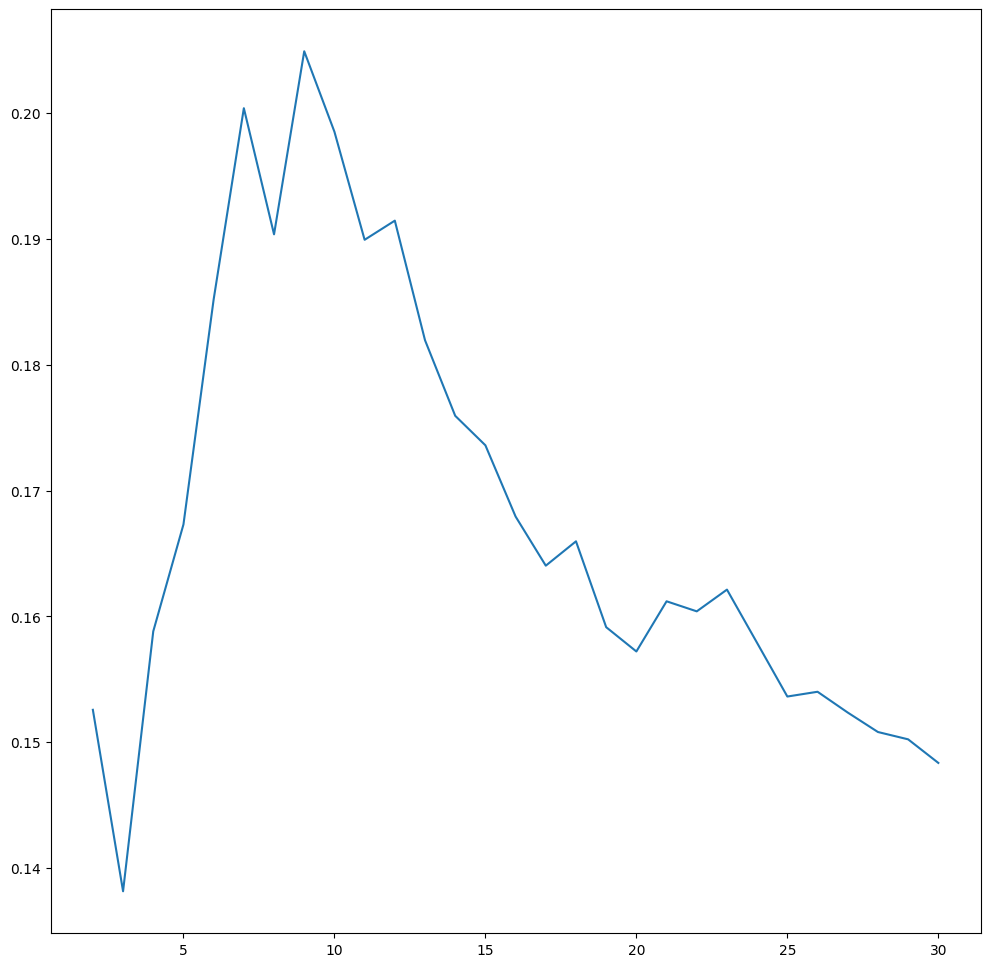

In [29]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))

    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

plot_silhoutte_score(X,30)

We plot number of clusters vs silhoutte score, the silhoutte score hits it's maximum at around 10 clusters.

**Soft clustering**
* In soft clustering every point is a part of every cluster with a certain probability.
* Gaussian Mixture Model is a soft clustering algorithm which uses Estimation Maximization algorithm to learn the parameters.
* The following function finds the best covariance type and number of components based on bayesian information criterion.

In [32]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components+1)
    cv_types = ['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.55, bottom=.02)
    plt.show()
    return best_gmm

<ipython-input-32-3d0ec80a9ea5>:55: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)


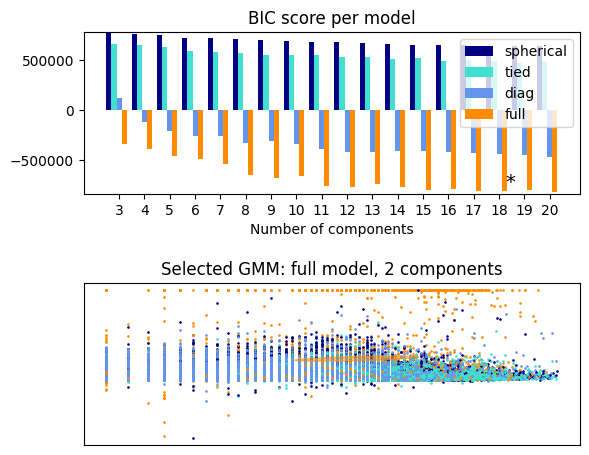

In [33]:
gmm = ncomponents_of_gmm(X, 3, 20)